In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('data/space_titanic.csv',skipinitialspace=True)

#Enunciado

The Spaceship Titanic was an interstellar passenger liner launched a month ago. With almost 13,000 passengers on board, the vessel set out on its maiden voyage transporting emigrants from our solar system to three newly habitable exoplanets orbiting nearby stars.

While rounding Alpha Centauri en route to its first destination—the torrid 55 Cancri E—the unwary Spaceship Titanic collided with a spacetime anomaly hidden within a dust cloud. Sadly, it met a similar fate as its namesake from 1000 years before. Though the ship stayed intact, almost half of the passengers were transported to an alternate dimension!

To help rescue crews and retrieve the lost passengers, you are challenged to predict which passengers were transported by the anomaly using records recovered from the spaceship’s damaged computer system.

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

#Descripción variables

    PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
    HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
    CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
    Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
    Destination - The planet the passenger will be debarking to.
    Age - The age of the passenger.
    VIP - Whether the passenger has paid for special VIP service during the voyage.
    RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
    Name - The first and last names of the passenger.
    Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.
    

In [65]:
df1.shape

(8693, 14)

In [66]:
df1.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

Curiosamente la unica columna booleana es la predictora aunque las columnas de VIP y CryoSleep toman valores true y false, estan codificadas como objects.

In [67]:
df1.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df1.tail()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False
8692,9280_02,Europa,False,E/608/S,TRAPPIST-1e,44.0,False,126.0,4688.0,0.0,0.0,12.0,Propsh Hontichre,True


In [40]:
df1.isna().sum() #la mayoria de variables tienen valores null

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [41]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [42]:
df1.describe() #exceptuando age, el resto son cantidades en euros que indican si el cliente ha pagado un extra y cuanto

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<AxesSubplot: >

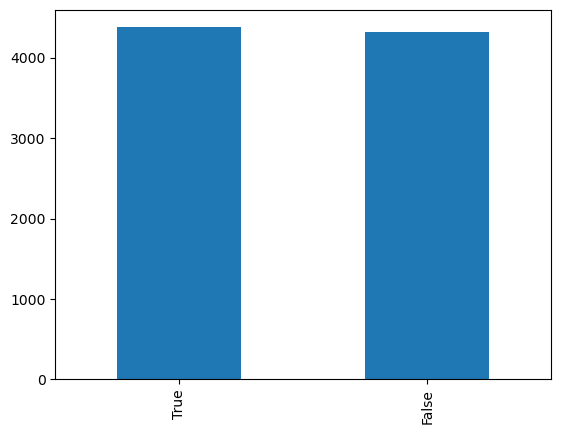

In [14]:
df1.Transported.value_counts().plot(kind='bar') #la variable predictora esta balanceada

<AxesSubplot: xlabel='CryoSleep', ylabel='count'>

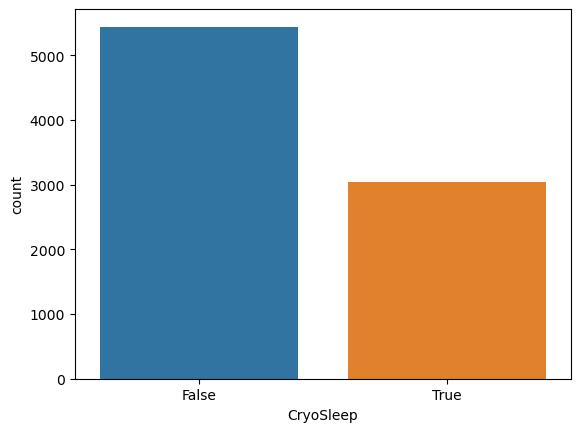

In [15]:
sns.countplot(x=df1['CryoSleep'])

<AxesSubplot: xlabel='VIP', ylabel='count'>

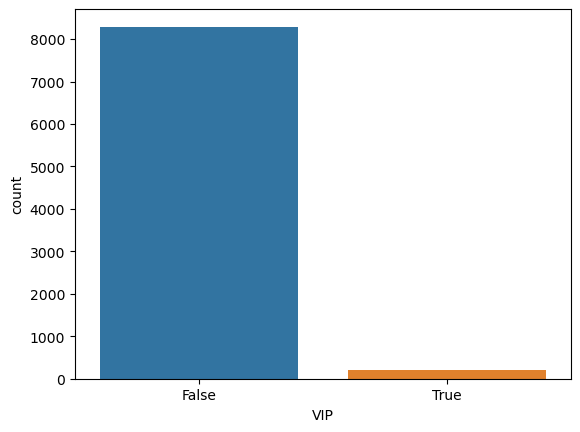

In [16]:
sns.countplot(x=df1['VIP']) #la mayoria no es VIP

<AxesSubplot: xlabel='VIP', ylabel='count'>

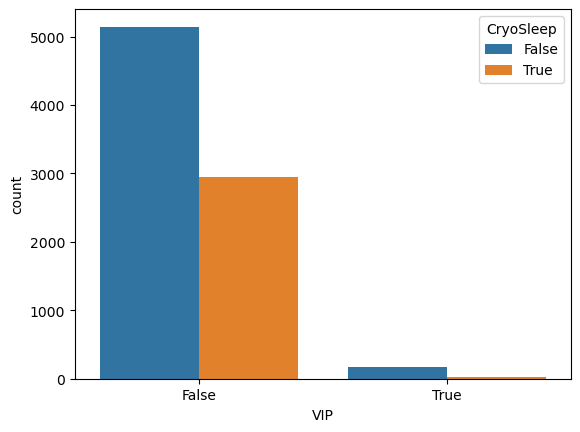

In [29]:
sns.countplot(x=df1['VIP'],hue=df1['CryoSleep'])

In [31]:
df1.groupby(['VIP','CryoSleep']).count() #¿Hay gente que paga VIP y est Criogenizado?

PassengerId  HomePlanet  Cabin  Destination   Age  \
VIP   CryoSleep                                                      
False False             5143        5026   5046         5018  5052   
      True              2941        2867   2858         2894  2861   
True  False              175         171    169          173   174   
      True                21          20     21           21    21   

                 RoomService  FoodCourt  ShoppingMall   Spa  VRDeck  Name  \
VIP   CryoSleep                                                             
False False             5038       5039          5046  5032    5027  5018   
      True              2875       2874          2846  2878    2880  2880   
True  False              171        171           170   174     172   172   
      True                21         20            21    20      20    21   

                 Transported  
VIP   CryoSleep               
False False             5143  
      True              2941  
True  False              175  
      True                21

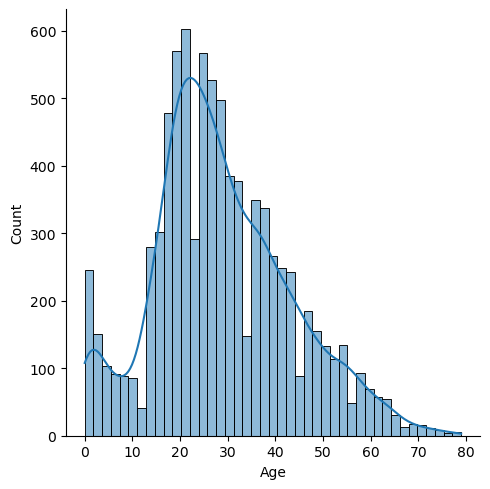

In [46]:
sns.displot(data=df1, x="Age", kde=True)

In [20]:
print(f"Skewness: {df1['Age'].skew()}")
print(f"Kurtosis: {df1['Age'].kurt()}")

Skewness: 0.41909658301471536
Kurtosis: 0.10193291871208343


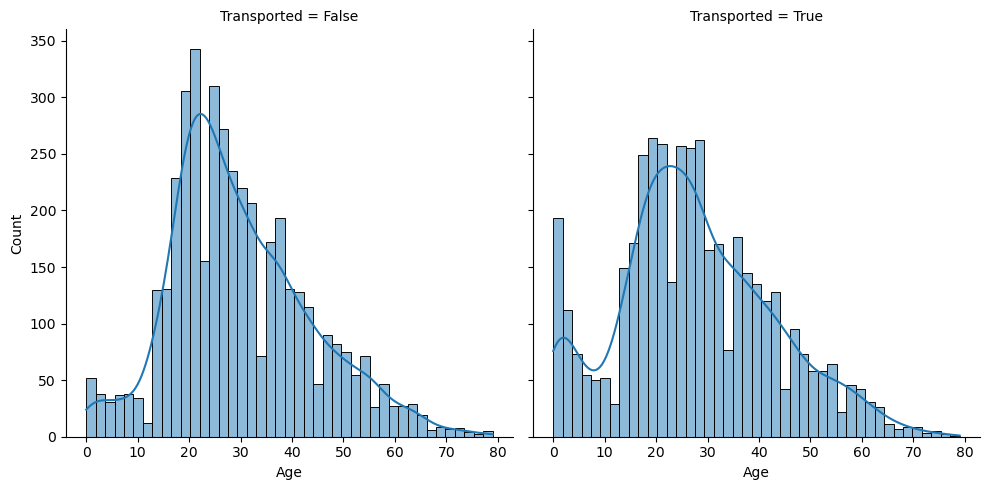

In [96]:
sns.displot(data=df1, x="Age",col="Transported", kde=True)

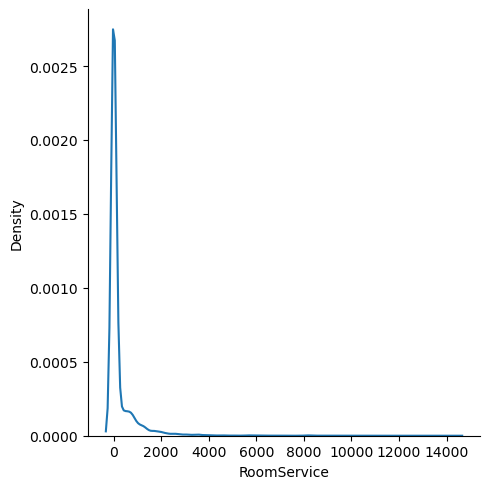

In [19]:
sns.displot(data=df1, x="RoomService", kind="kde")

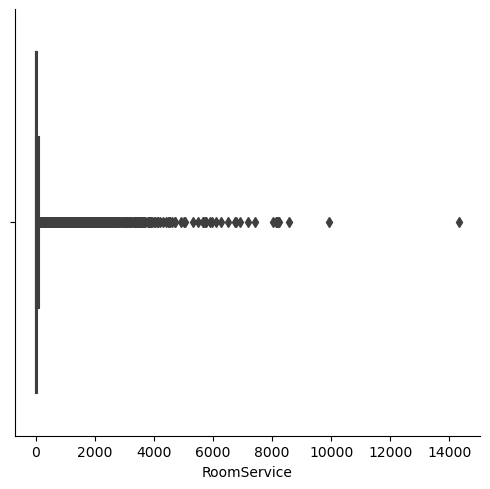

In [52]:
sns.catplot(data=df1, x="RoomService", kind="box")

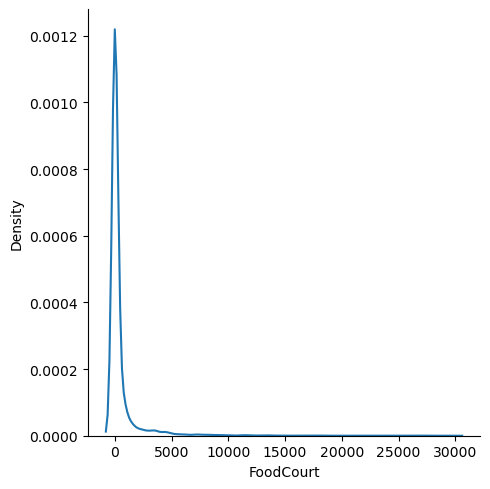

In [49]:
sns.displot(data=df1, x="FoodCourt", kind="kde")

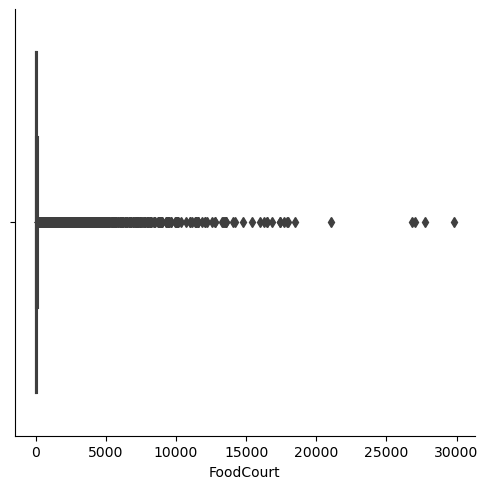

In [53]:
sns.catplot(data=df1, x="FoodCourt", kind="box")

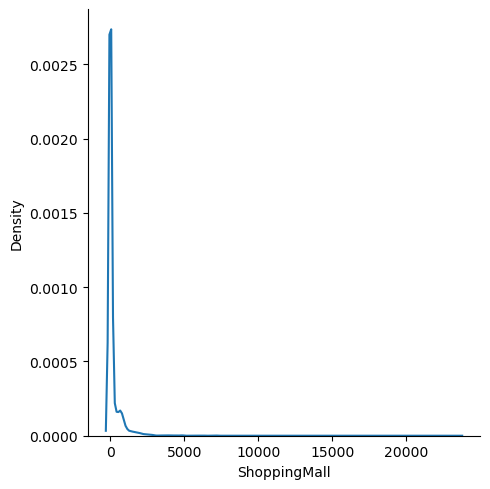

In [50]:
sns.displot(data=df1, x="ShoppingMall", kind="kde")

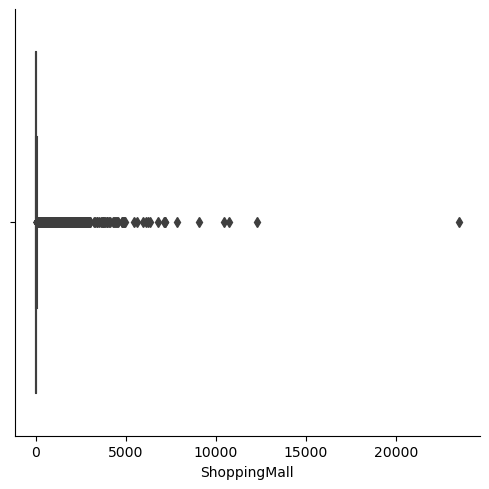

In [51]:
sns.catplot(data=df1, x="ShoppingMall", kind="box")

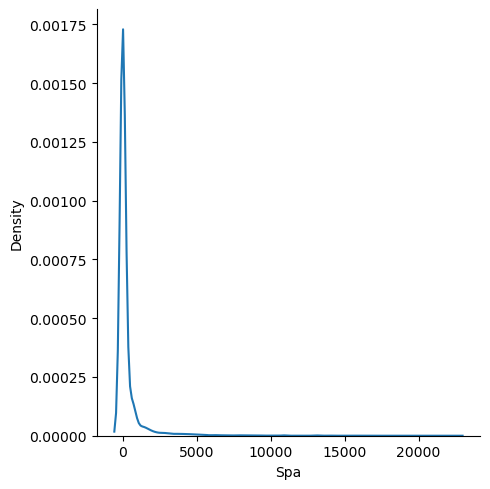

In [54]:
sns.displot(data=df1, x="Spa", kind="kde")

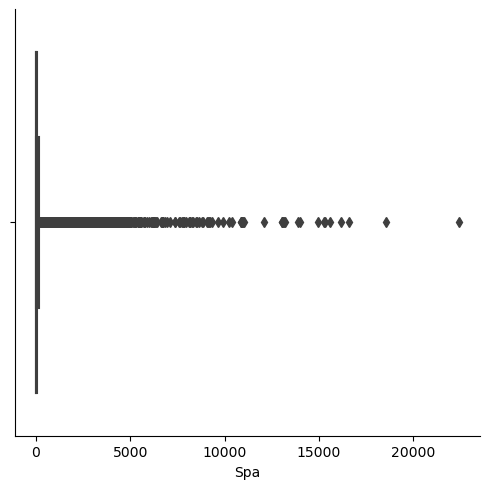

In [56]:
sns.catplot(data=df1, x="Spa", kind="box")

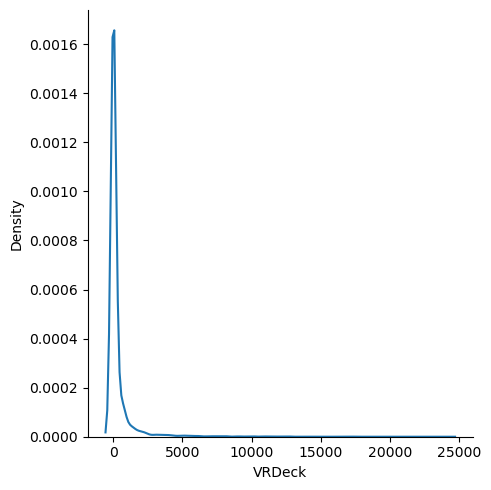

In [57]:
sns.displot(data=df1, x="VRDeck", kind="kde")

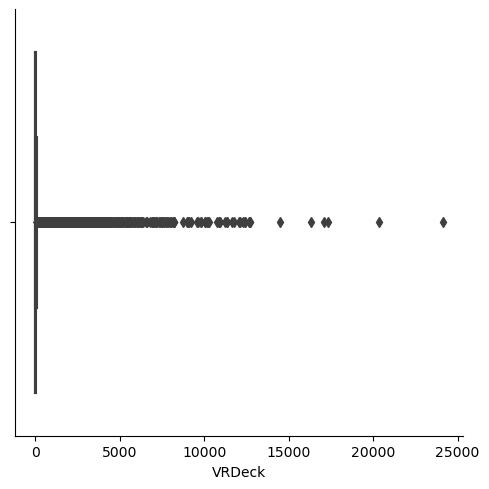

In [58]:
sns.catplot(data=df1, x="VRDeck", kind="box")

<AxesSubplot: xlabel='RoomService', ylabel='Age'>

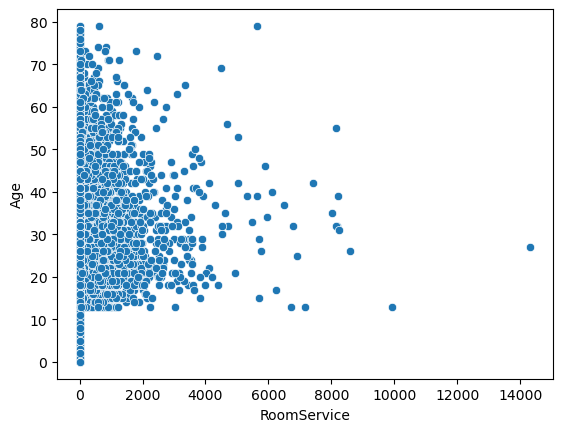

In [60]:
sns.scatterplot(data=df1, x="RoomService", y="Age") #no se ve correlación

<AxesSubplot: xlabel='ShoppingMall', ylabel='Age'>

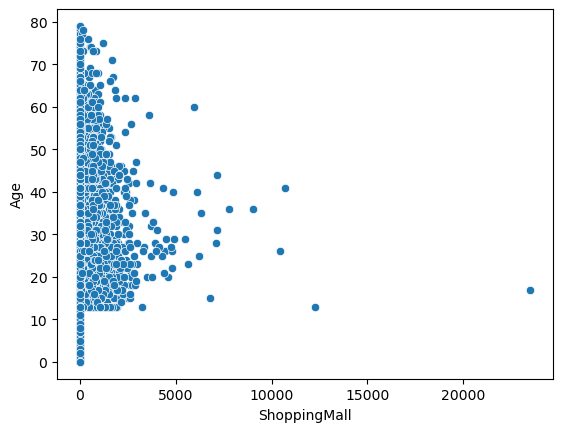

In [61]:
sns.scatterplot(data=df1, x="ShoppingMall", y="Age") #no se ve correlación

<AxesSubplot: xlabel='Spa', ylabel='Age'>

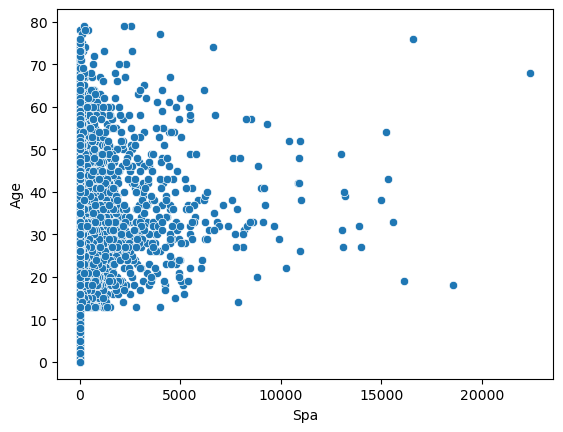

In [62]:
sns.scatterplot(data=df1, x="Spa", y="Age") #no se ve correlación

<AxesSubplot: xlabel='VRDeck', ylabel='Age'>

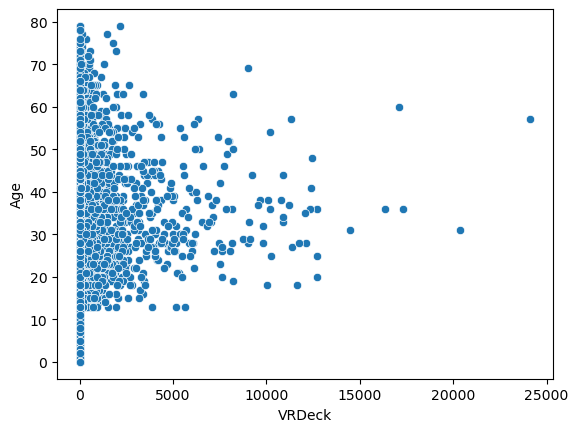

In [63]:
sns.scatterplot(data=df1, x="VRDeck", y="Age") #no se ve correlación

/tmp/ipykernel_3719/2350760132.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)


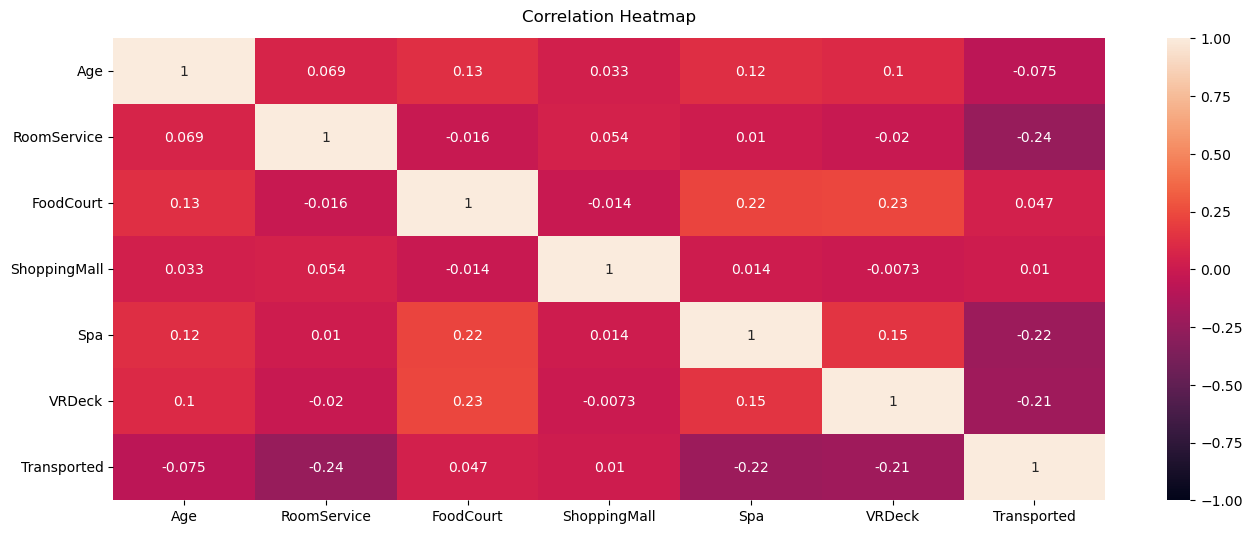

In [64]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df1.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [98]:
pd.crosstab(df1['Destination'],df1['HomePlanet'])

HomePlanet,Earth,Europa,Mars
Destination,,,
55 Cancri e,690,886,193
PSO J318.5-22,712,19,49
TRAPPIST-1e,3101,1189,1475


In [99]:
pd.crosstab(df1['Destination'],df1['Transported'])

Transported,False,True
Destination,,
55 Cancri e,702,1098
PSO J318.5-22,395,401
TRAPPIST-1e,3128,2787


In [100]:
pd.crosstab(df1['HomePlanet'],df1['Transported']) 

Transported,False,True
HomePlanet,,
Earth,2651,1951
Europa,727,1404
Mars,839,920


In [101]:
pd.crosstab(df1['VIP'],df1['Transported']) #La mayoria no ha pagado VIP (como se puede ver en gráficos anteriores)

Transported,False,True
VIP,,
False,4093,4198
True,123,76


In [3]:
df1.duplicated().sum() #No hay duplicados

0

<AxesSubplot: xlabel='Age', ylabel='Destination'>

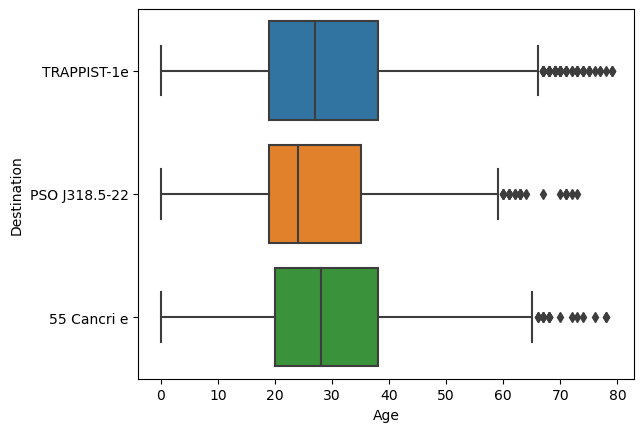

In [70]:
sns.boxplot(data=df1, x="Age", y="Destination")

<AxesSubplot: xlabel='Age', ylabel='HomePlanet'>

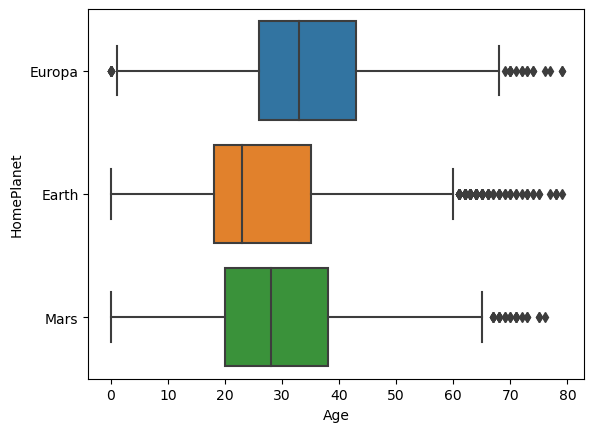

In [17]:
sns.boxplot(data=df1, x="Age", y="HomePlanet")

In [29]:
print(df1["Cabin"].value_counts()) #las cabinas pueden ser compartidas

G/734/S     8
G/109/P     7
B/201/P     7
G/1368/P    7
G/981/S     7
           ..
G/556/P     1
E/231/S     1
G/545/S     1
G/543/S     1
F/947/P     1
Name: Cabin, Length: 6560, dtype: int64


ETL --Falta por Hacer---

<AxesSubplot: xlabel='HomePlanet', ylabel='count'>

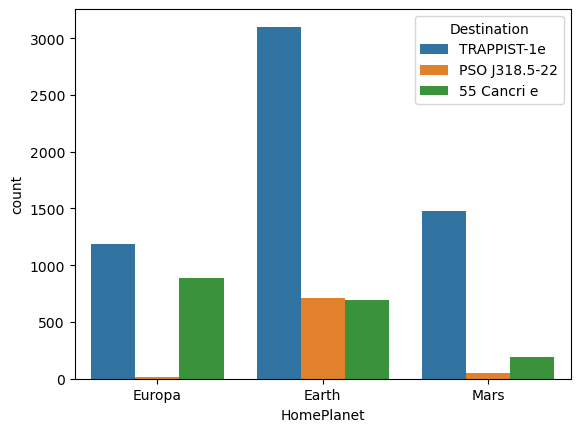

In [3]:
sns.countplot(x=df1['HomePlanet'],hue=df1['Destination'])